In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
pd.options.mode.chained_assignment = None
import math
import numpy as np

In [40]:
bldgs = os.listdir('Consumption/Batch 1')
bldg_id = [b.replace('-0.parquet', '') for b in bldgs]
AEC = {'TimeStamp':pd.read_parquet(f'Consumption/Batch 1/{bldgs[0]}', engine='pyarrow')['timestamp'].values}
for entry in bldgs:
    AEC[entry.replace('-0.parquet', '') + '-1'] = pd.read_parquet(f'Consumption/Batch 1/{entry}', engine='pyarrow')['out.electricity.total.energy_consumption'].values
    AEC[entry.replace('-0.parquet', '') + '-2'] = pd.read_parquet(f'Consumption/Batch 2/{entry}', engine='pyarrow')['out.electricity.total.energy_consumption'].values
AEC = pd.DataFrame(AEC)
AEC.to_csv('Consumption/TexasHarrisConsumption15.csv', index=None)

In [61]:
AEC = pd.read_csv('Consumption/TexasHarrisConsumption15.csv')
AEC_hourly = pd.DataFrame(index=range(365*24*2), columns=AEC.columns)
entries = AEC_hourly.columns[1:]
for r in range(len(AEC)):
    if r%2 == 0:
        row = int(r / 2)
        AEC_hourly['TimeStamp'].iloc[row] = AEC['TimeStamp'].iloc[r]
        for e in entries:
            AEC_hourly[e].iloc[row] = AEC[e].iloc[r] + AEC[e].iloc[r+1] + AEC[e].iloc[r+2] + AEC[e].iloc[r+3]

IndexError: single positional indexer is out-of-bounds

In [59]:
AEC_hourly.to_csv('TexasHarrisConsumption30.csv', index=None)

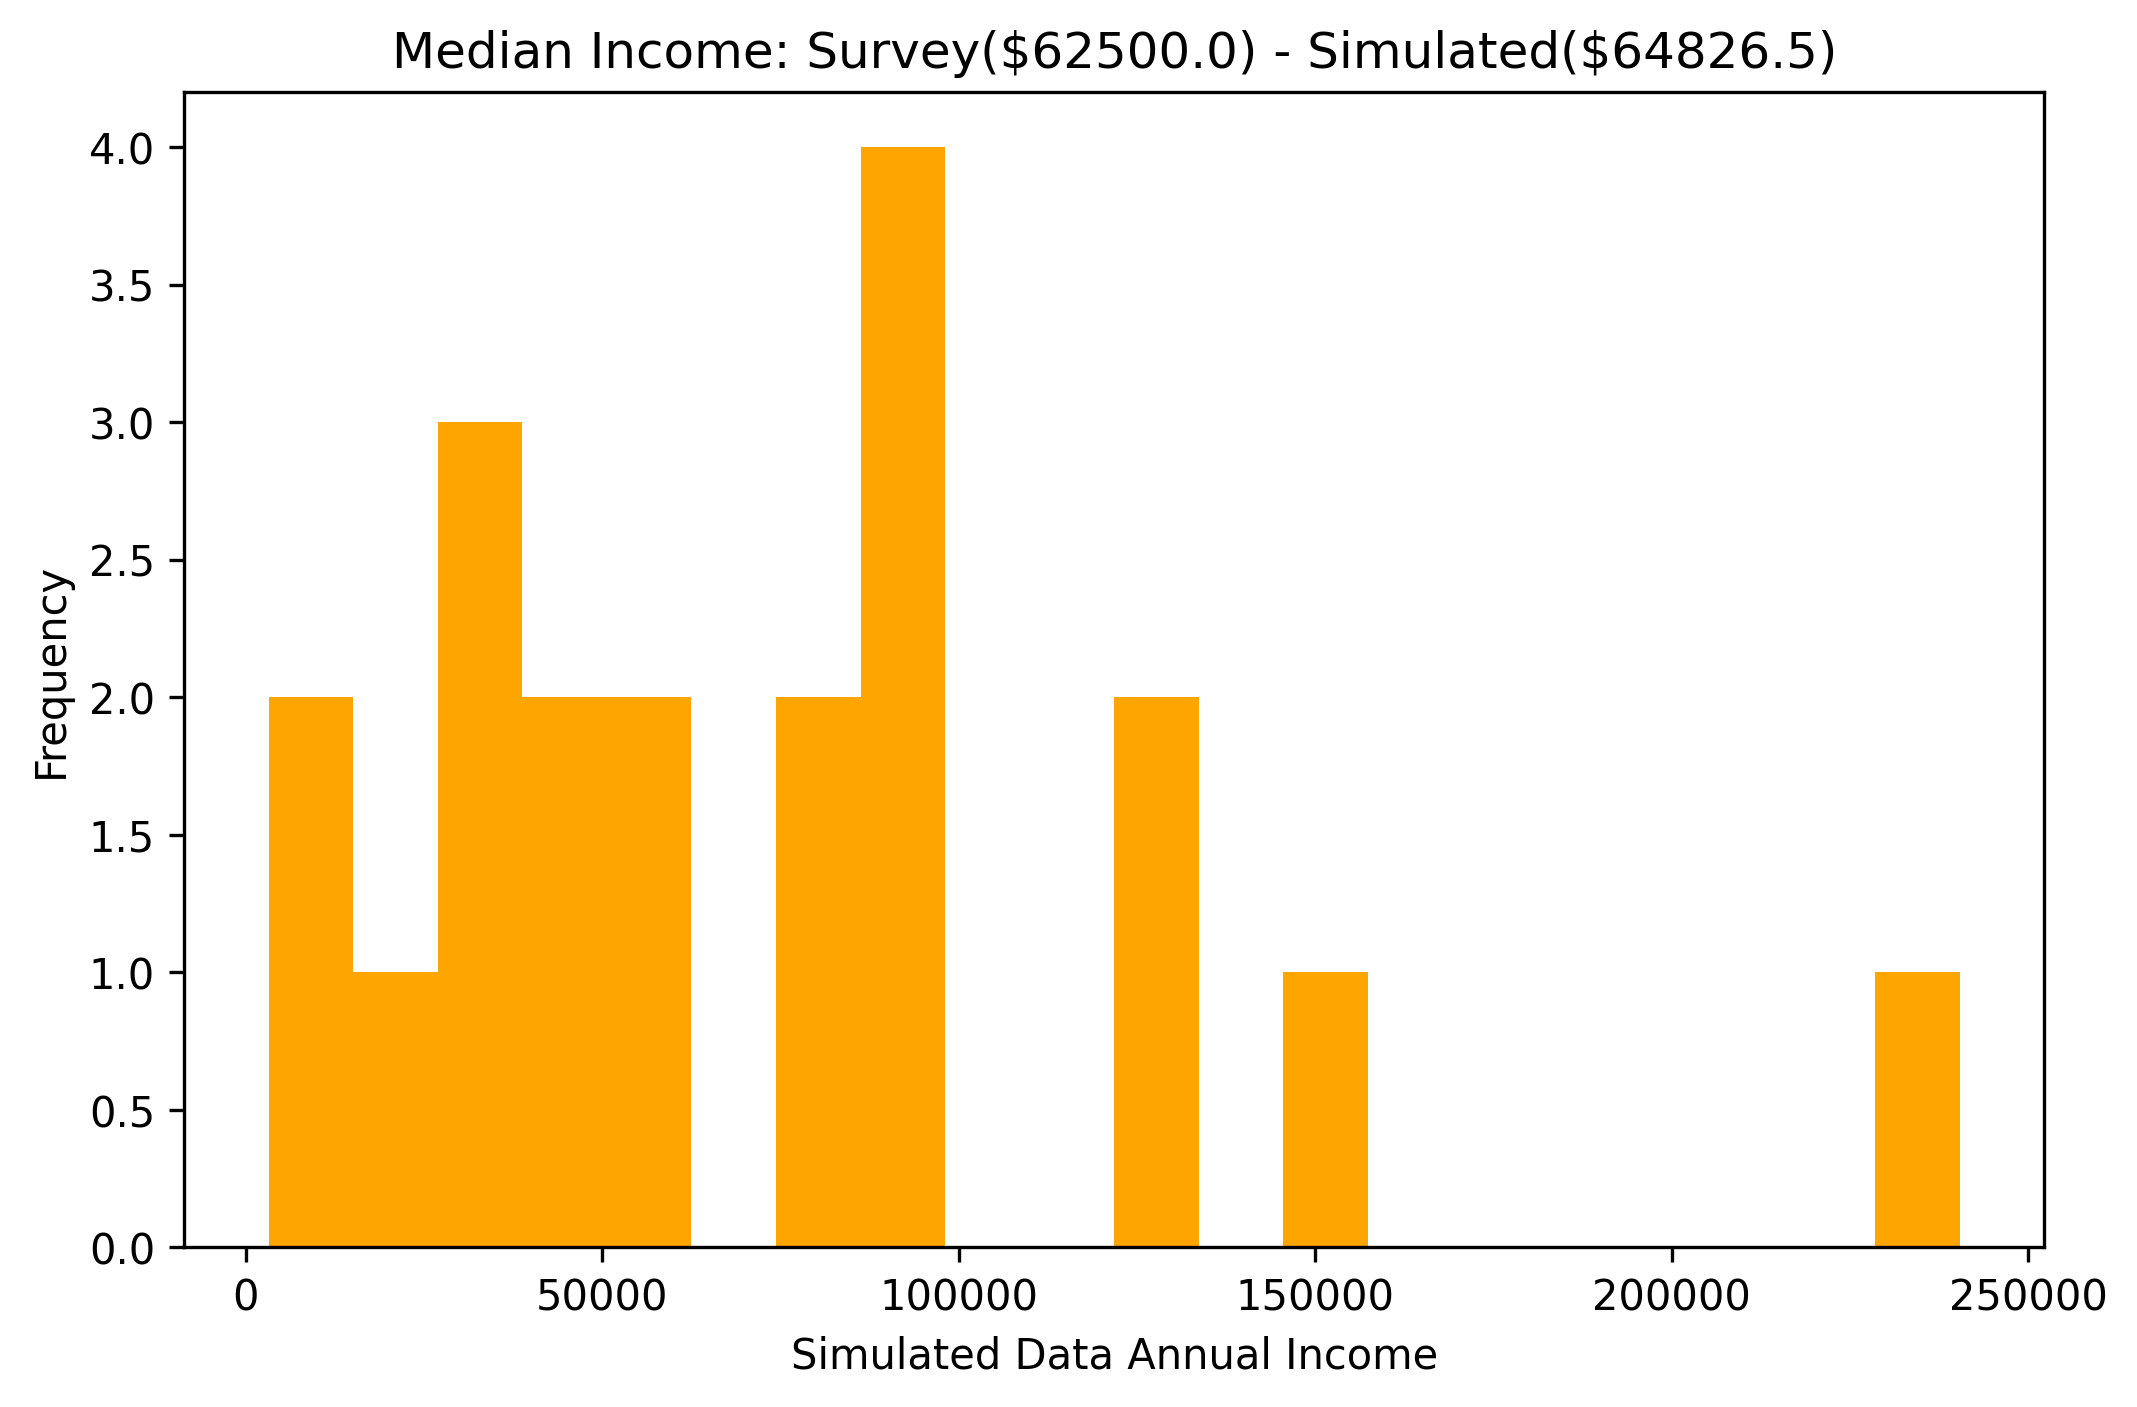

In [53]:
income = pd.read_csv('area_median_income_and_income_lookup.csv')
income_list = []
for b in bldg_id:
    income_list.append(income[income['bldg_id'] == int(b)]['in.household_income'].iloc[0])

plt.figure(figsize=(8, 5), dpi=300)
plt.hist(income_list, bins=20, color='orange')
plt.xlabel('Simulated Data Annual Income')
plt.ylabel('Frequency')
plt.title(f'Median Income: Survey(\$62500.0) - Simulated(\${np.median(income_list):0.1f})')
plt.savefig('IMG/Income.jpg', bbox_inches='tight')